In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Owner\anaconda3\envs\python_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#sorting dataset by countryes
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index= 'job_title_short',
    columns='job_country',
    aggfunc = 'median', 
    )

df_job_country_salary

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


<Axes: xlabel='job_country'>

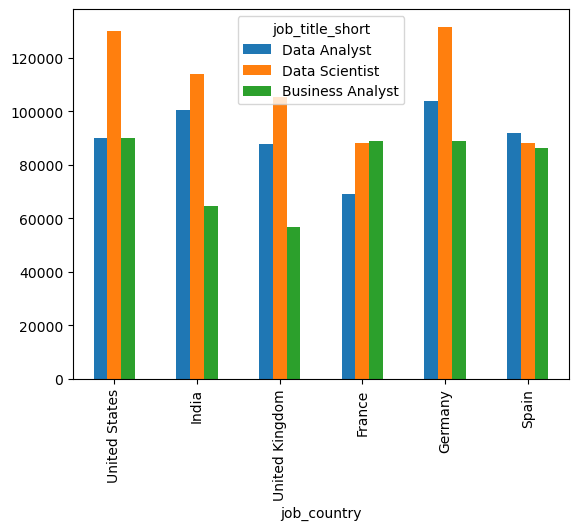

In [32]:
top_countries = df['job_country'].value_counts().head(6).index
df_job_country_salary = df_job_country_salary.loc[:,top_countries]

# filter by specific job titles like data analyst, business analyst, data scientist
job_title = ['Data Analyst', 'Data Scientist', 'Business Analyst']
df_job_salary_filtered = df_job_country_salary.loc[job_title,:]
df_job_salary_filtered = df_job_salary_filtered.transpose()
df_job_salary_filtered.plot(kind="bar")
#df_job_salary_filtered.set_index('job_country', inplace=True)

In [20]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      -